## B001 Abhishek Aggarwal
## B026 Vaibhav Hawaldar
## B028 Rishabh Jain
## B043 Mihir Mengde

## Aim:
To detect the size of the apple and detect if the apple is riped or unriped.

## Normal Detection

In [ ]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray   #converts color to grey image
import numpy as np 

(927, 1024, 3)

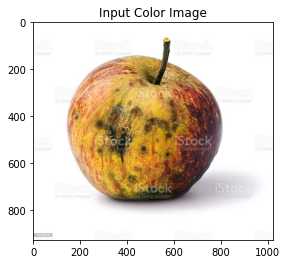

In [ ]:
Im1 = plt.imread("bad_apple.jpg")
plt.figure();
plt.imshow(Im1)  
plt.title('Input Color Image');
Im1.shape

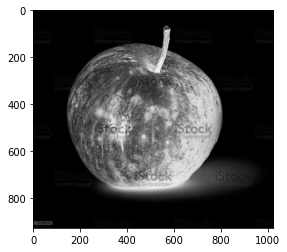

In [ ]:
#Converting to gray image
grayIm11 = 255*rgb2gray(Im1)
grayIm1 = 255-grayIm11
plt.figure()
plt.imshow(grayIm1,cmap = "gray")

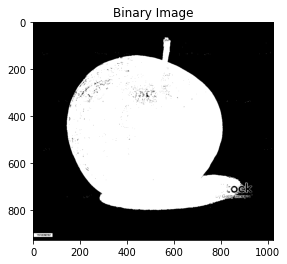

In [ ]:
#Thresholding the image
Threshold = 220
binaryIm1 = grayIm11.copy()
row,col = grayIm11.shape
for r in range(row):
  for c in range(col):
    if(grayIm11[r,c]<Threshold):
      binaryIm1[r,c] =  255
    else: 
      binaryIm1[r,c] = 0
plt.figure()
plt.imshow(binaryIm1, cmap = "gray")
plt.title('Binary Image');

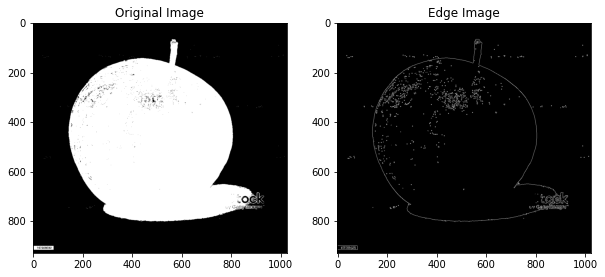

In [ ]:
#Applying canny edge detection
import cv2 as cv
slice1Copy = np.uint8(binaryIm1)
edges = cv.Canny(slice1Copy,80,180)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(binaryIm1,cmap = 'gray')
plt.title('Original Image') 
plt.subplot(122)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')  
plt.show()

Text(0.5, 1.0, 'Foreground mask image')

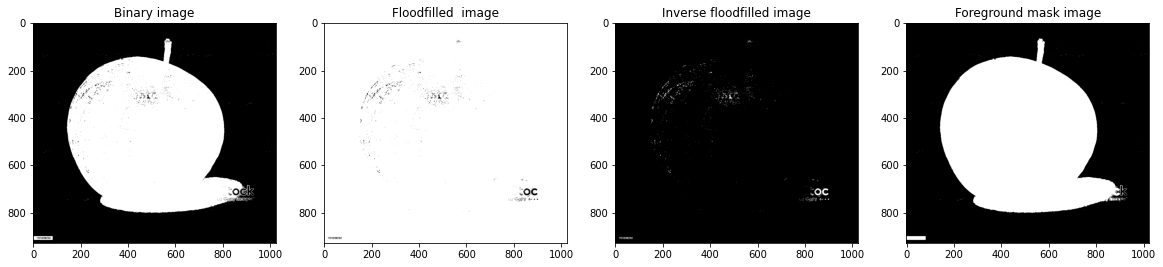

In [ ]:
#Flood filling the image for getting the shape of apple
h, w = binaryIm1.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
im_floodfill = np.uint8(binaryIm1.copy())
cv.floodFill(im_floodfill, mask, (0,0), 255)
 
# Invert floodfilled image
im_floodfill_inv = cv.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = np.uint8(binaryIm1)| im_floodfill_inv
 
# Display images.
plt.figure(figsize=(20,10))

plt.subplot(141)
plt.imshow(binaryIm1,cmap = "gray")
plt.title("Binary image")

plt.subplot(142)
plt.imshow(im_floodfill,cmap = "gray")
plt.title("Floodfilled  image")

plt.subplot(143)
plt.imshow(im_floodfill_inv,cmap = "gray")
plt.title("Inverse floodfilled image")

plt.subplot(144)
plt.imshow(im_out,cmap = "gray")
plt.title("Foreground mask image")

In [ ]:
im_out.shape

(927, 1024)

In [ ]:
#Counting the apple part by counting the pixel of apple
count2 = 0;
m,n = im_out.shape;
for i in range(m):
  for j in range(n):
     if(im_out[i,j]==255):
        count2 = count2 +1

In [ ]:
count2

366963

In [ ]:
#predicting the size of the apple
if(count2 > 180000):
    print('Large Sized Apple');
elif(count2<100000):
    print('Small Sized Apple');
else:
    print('Medium Sized Apple');

Large Sized Apple


In [ ]:
histogram, bin_edges = np.histogram(grayIm1, bins=256)

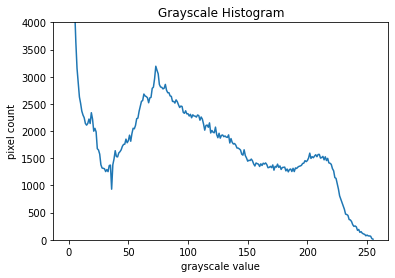

In [ ]:
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.ylim([0.0, 4000.0])  # <- named arguments do not work here

plt.plot(histogram)  # <- or here

In [ ]:
#Applying
[M,N] = grayIm1.shape
alpha = 50;  
count = 1;
count1 = 1;
for  i in range(M):
    for  j in range(N):
      if(grayIm1[i,j]>alpha and grayIm1[i,j]<alpha + 75):
          count = count + 1 #bad apple
      elif(grayIm1[i,j]>alpha+75 and grayIm1[i,j]<255):
          count1 = count1 + 1 #good apple

In [ ]:
count,count1

(181250, 158106)

In [ ]:
R = count/count1 
if (R>1):
    print('Bad apple');
else:
    print('Good apple');

Bad apple


## Filing Holes and detection

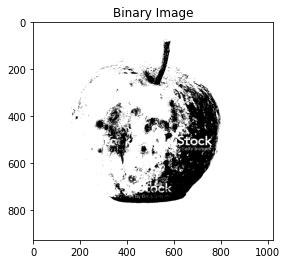

In [ ]:
Threshold = 100
binaryIm12 = grayIm11.copy()
row,col = grayIm11.shape
for r in range(row):
  for c in range(col):
    if(grayIm11[r,c]<Threshold):
      binaryIm12[r,c] =  0
    else: 
      binaryIm12[r,c] = 255
plt.figure()
plt.imshow(binaryIm12, cmap = "gray")
plt.title('Binary Image');

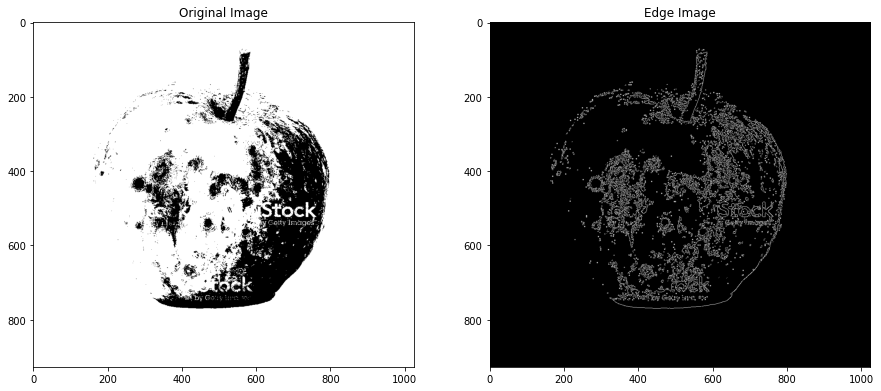

In [ ]:
import cv2 as cv

slice1Copy = np.uint8(binaryIm12)
edges1 = cv.Canny(slice1Copy,40,120)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(binaryIm12,cmap = 'gray')
plt.title('Original Image') 
plt.subplot(122)
plt.imshow(edges1,cmap = 'gray')
plt.title('Edge Image')  
plt.show()

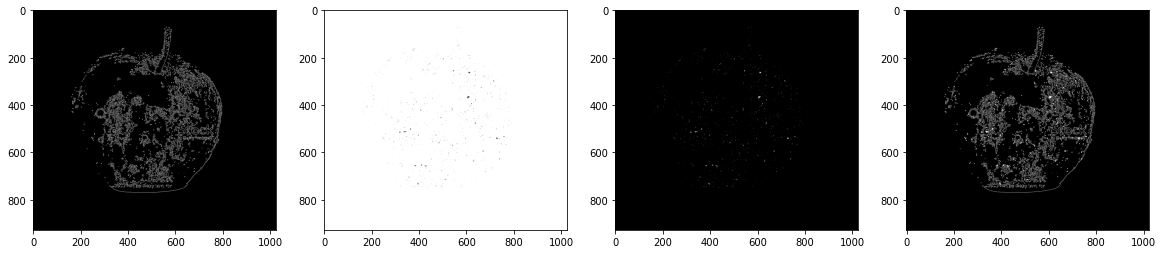

In [ ]:
h, w =  edges1.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
im_floodfill = np.uint8(edges1.copy())
cv.floodFill(im_floodfill, mask, (0,0), 255)
 
# Invert floodfilled image
im_floodfill_inv = cv.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = np.uint8(edges1)| im_floodfill_inv
 
# Display images.
plt.figure(figsize=(20,10))

plt.subplot(141)
plt.imshow(edges1,cmap = "gray")

plt.subplot(142)
plt.imshow(im_floodfill,cmap = "gray")

plt.subplot(143)
plt.imshow(im_floodfill_inv,cmap = "gray")

plt.subplot(144)
plt.imshow(im_out,cmap = "gray")

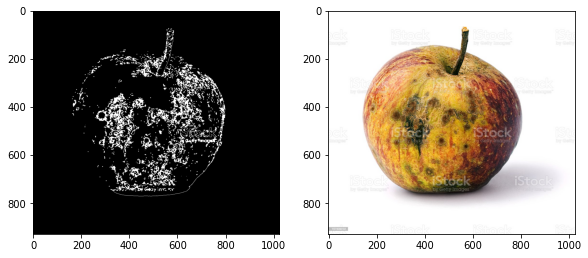

In [ ]:
#dilating the floodfilled image
kernel = np.ones((3,3), np.uint8)
img_dilation = cv.dilate(edges1, kernel, iterations=1)
plt.figure(figsize=(15,15))


img_erosion = cv.erode(img_dilation, kernel, iterations=1)
plt.subplot(132)
plt.imshow(img_erosion,cmap="gray")

plt.subplot(133)
plt.imshow(Im1,cmap="gray")

Bad apple


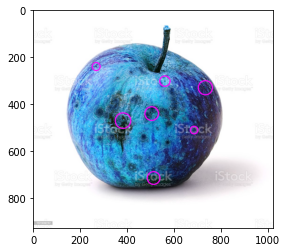

In [ ]:
#circle detection
src = cv.imread(cv.samples.findFile("bad_apple.jpg"), cv.IMREAD_COLOR)

gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)   
gray = cv.medianBlur(gray, 5)
rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=10, maxRadius=40)   
    
if circles is not None:
    print("Bad apple")
else:
    print("Good apple")

if circles is not None:
     circles = np.uint16(np.around(circles))
     for i in circles[0, :]:
         center = (i[0], i[1])
         # circle center
         cv.circle(src, center, 1, (0, 100, 100), 3)
         # circle outline
         radius = i[2]
         cv.circle(src, center, radius, (255, 0, 255), 3)
 
 
plt.imshow(src,cmap = "gray")

Bad apple


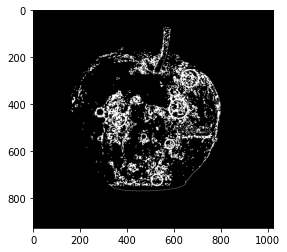

In [ ]:
rows = img_erosion.shape[0]
circles = cv.HoughCircles(img_erosion, cv.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=10, maxRadius=50)
    
    
if circles is not None:
    print("Bad apple")
else:
    print("Good apple")

if circles is not None:
     circles = np.uint16(np.around(circles))
     for i in circles[0, :]:
         center = (i[0], i[1])
         # circle center
         cv.circle(img_erosion, center, 1, (0, 100, 100), 3)  #(image, center_coordinates, radius, color, thickness)
         # circle outline
         radius = i[2]
         cv.circle(img_erosion, center, radius, (255, 0, 255), 3)
 
 

plt.imshow(img_erosion,cmap = 'gray')

## Conclusion:

Original Image was converted into gray image and THRESHOLD was applied to convert it into Binary image. 

CANNY-EDGE detection was applied on binary image to detect edges and fill holes. 

Number of pixels were counted where the pixel is dark on the modified image to determine the size of the image. 

The image was converted into grayimage and using alpha factor predicted using histogram,ripe ratio was calculated to check for good and bad fruit.